<a href="https://colab.research.google.com/github/syedanida/Clustering/blob/main/KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install autogluon --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.0/428.0 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [16]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.5.2 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.5.2 which is incompatible.
autogluon-multimodal 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.5.2 which is incompatible.
autogluon-tabular 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.5.2 which is incompatible.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.3 which 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from autogluon.tabular import TabularPredictor

<ipython-input-18-747e53b25525>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


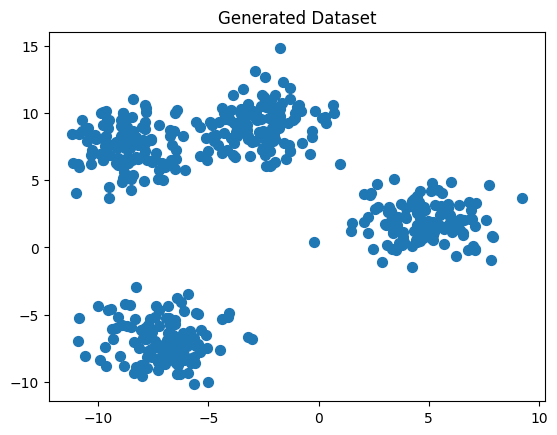

Sample data point: [-7.11441777  6.26875828]
Number of data points: 500


In [18]:
# Generate synthetic dataset
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=1.5, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Generated Dataset')
plt.show()

print("Sample data point:", X[0])
print("Number of data points:", len(X))

In [19]:
# K-Means Clustering from Scratch
def kmeans(X, num_clusters, seed=42, verbose=False):
    rng = np.random.RandomState(seed)

    # Randomly initialize cluster centers
    i = rng.permutation(X.shape[0])[:num_clusters]
    current_centers = X[i]
    print("Initial cluster centers:", current_centers)

    count = 0
    while True:
        # Assign points to closest cluster center
        labels = pairwise_distances_argmin(X, current_centers)

        # Compute new centers as mean of points in each cluster
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(num_clusters)])

        # Check for convergence
        if np.all(current_centers == new_centers):
            break
        current_centers = new_centers
        count += 1

    print(f"K-Means converged in {count} iterations!")
    return current_centers, labels


In [20]:
# Apply K-Means
centers, labels = kmeans(X, num_clusters=4, verbose=False)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b0e390f2cb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/scipy.libs/libopenblasp-r0-01191904.3.27.so: cannot open shared object file: No such file or directory
Exception ignored on calling ctypes callback function: <function ThreadpoolCon

Initial cluster centers: [[-3.32577171  9.18067001]
 [-8.64617113  6.30194543]
 [-9.7017845   7.50653764]
 [-9.16977402  7.36385167]]
K-Means converged in 6 iterations!


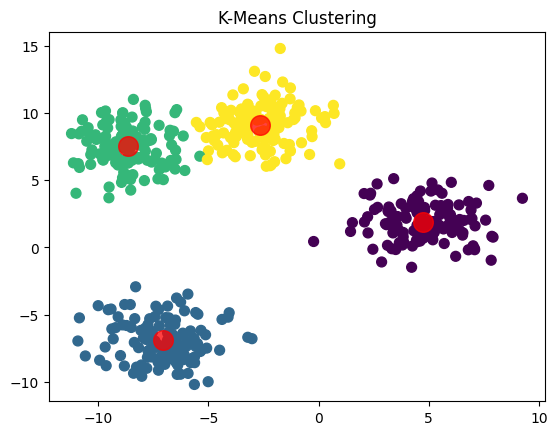

In [21]:
# Visualize Clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.show()

In [22]:
# Create tabular data for AutoML
import pandas as pd

data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Cluster'] = labels
data['Cluster'] = data['Cluster'].astype('category')  # Target column

In [23]:
# AutoML with AutoGluon
train_data = data.sample(frac=0.8, random_state=42)  # 80% training data
test_data = data.drop(train_data.index)  # Remaining 20% as testing data

predictor = TabularPredictor(label='Cluster').fit(train_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20241121_230122"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.00 GB / 12.67 GB (86.8%)
Disk Space Avail:   65.89 GB / 107.72 GB (61.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

In [24]:
# Evaluate model performance
predictor.evaluate(test_data)

{'accuracy': 0.97,
 'balanced_accuracy': 0.9702152891808065,
 'mcc': 0.9606004097379525}

In [25]:
# Predict and visualize predictions
predictions = predictor.predict(test_data)

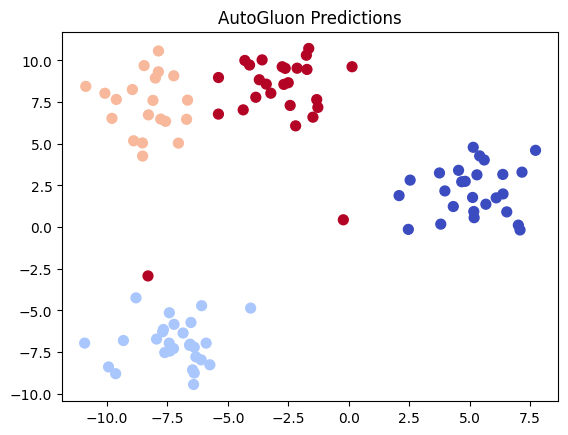

In [26]:
plt.scatter(test_data['Feature1'], test_data['Feature2'], c=predictions, s=50, cmap='coolwarm')
plt.title('AutoGluon Predictions')
plt.show()

Model Accuracy on Test Data: 0.97


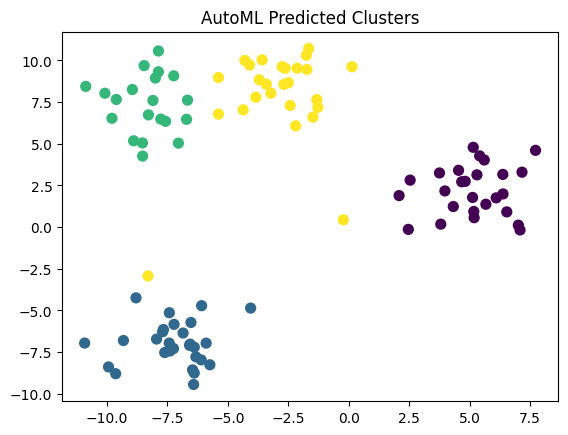

In [28]:
import pandas as pd

# Evaluate the predictor on test data
test_predictions = predictor.predict(test_data)
accuracy = predictor.evaluate(test_data)['accuracy']
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

# Visualize AutoML results
plt.scatter(test_data['Feature1'], test_data['Feature2'], c=test_predictions, s=50, cmap='viridis')
plt.title('AutoML Predicted Clusters')
plt.show()

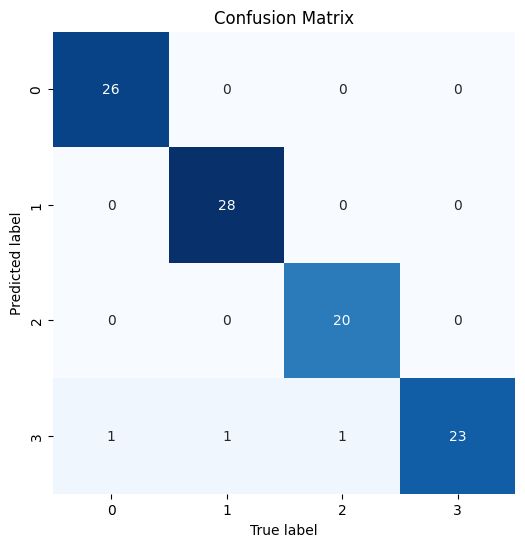

In [30]:
# Confusion Matrix
test_data['Cluster'] = test_data['Cluster'].astype('category')  # Convert to category if not already
test_predictions = test_predictions.astype('category')  # Convert predictions to category

# Calculate confusion matrix
mat = confusion_matrix(test_data['Cluster'], test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=train_data['Cluster'].cat.categories,
            yticklabels=train_data['Cluster'].cat.categories)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
